# Ames IA Home Price Prediction

## Exploratory Data Analysis (2/3)

## Contents: 
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)

## Exploratory Data Analysis

### All libraries

In [1]:
# Imports: 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Change the option to display with no max 
# Reference: (https://kakakakakku.hatenablog.com/entry/2021/04/19/090229)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read in the data

In [3]:
# Import test dataset
df_test = pd.read_csv('../data/v2_test_clean_dummified.csv')

In [4]:
df_test.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Norm,condition_2_PosA,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_qc_Fa,heating_qc_Gd,heating_qc_TA,central_air_Y,electrical_FuseA,electrical_FuseF,electrical_FuseP,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_Po,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,2658,190,69.0,9142,6,8,1910,1950,0.0,0,0,1020,1020,908,1020,0,1928,0,0,2,0,4,2,9,0,1910.0,1,440,0,60,112,0,0,0,0,4,2006,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [5]:
# Import cleaned datasets
df_train = pd.read_csv('../data/v2_train_clean_dummified.csv')
df_train.head()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_Co

In [6]:
df_train.describe()

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_Co

In [7]:
df_train.shape

(2051, 244)

In [8]:
# Import undummified train dataset (for chart purpose)
df_train_und = pd.read_csv('../data/v1_train_clean.csv')

### EDA

A histogram chart was created to show a distribution of home sale price. The price ranged from as low as 12,789 dollars to as high as 611,657 dollars, resulting in a wide distribution. The median sale price was around 162,500 dollars. Sale price exceeding 550,000 were reviewed and confirmed to be part of the dataset, as they were not considered outliers. 
Given the wide range of price distribuion, it is important to identify key factors that have the most influence on the market value of homes. 

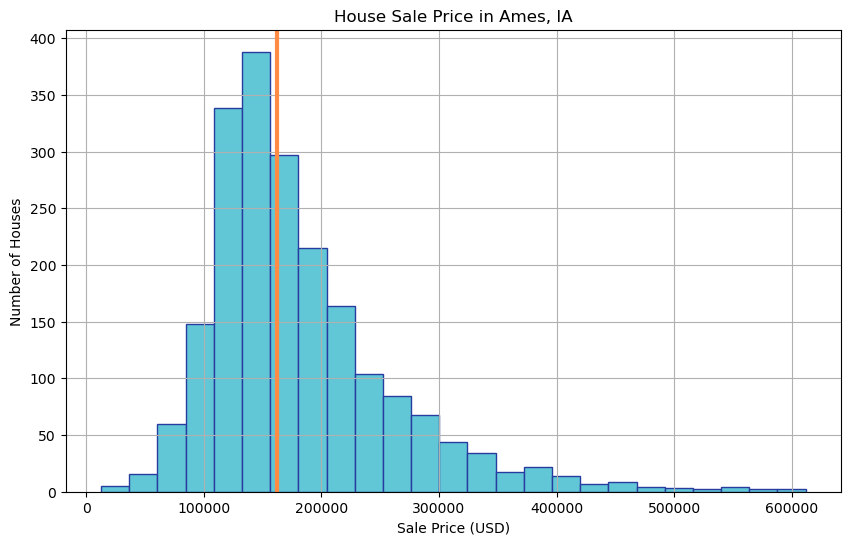

In [9]:
# Create a histogram of saleprice to see the distribution
df_train['saleprice'].hist(bins=25, color='#61c7d6', edgecolor='#283c9f', figsize=(10, 6))
plt.title('House Sale Price in Ames, IA')
plt.axvline(df_train['saleprice'].median(), color='#ff8b44', linewidth=3)
plt.xlabel('Sale Price (USD)')
plt.ylabel('Number of Houses');

In [10]:
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

In [11]:
# Chcek saleprice over 550_000 
df_train[df_train['saleprice'] > 550_000]

,id,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_Fin,garage_finish_RFn,garage_finish_Unf,garage_qual_Ex,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Ex,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_Co

### Correlation between dependent variables and 'saleprice'

Based on the correlations between different variables and `saleprice`, `overall_qual`, `gr_liv_area`, `garage_area`, `garage_cars`, `total_bsmt_sf` and `1st_flr_sf` columns have strong positive correlation to saleprice, while `exter_qual_TA` had strong negative correlation to saleprice. 

In [12]:
# Display the correlation between all variabvles and 'saleprice'
df_train_corr = df_train.corr()[['saleprice']].sort_values(by='saleprice', 
                                                           ascending=False)

The below heatmap shows the features that have a correlation coefficients of 0.6/-0.6 or greater with `saleprice`.

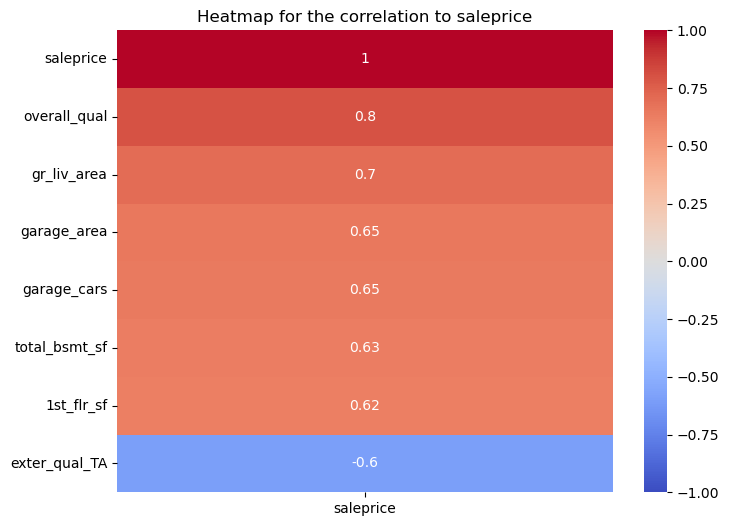

In [13]:
# Select columns that have equal or more than 60%/60% correlation to 'saleprice'
df_train_corr_60 = df_train_corr.loc[(df_train_corr['saleprice'] >= 0.6)|
                                     (df_train_corr['saleprice'] <= -0.6)]
df_train_corr_60
# Create a heatmap
plt.figure(figsize = (8,6))
sns.heatmap(df_train_corr_60.sort_values(by='saleprice', ascending=False),
            annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');
plt.title('Heatmap for the correlation to saleprice');

## Feature Engineering

Feature engineering is the process of selecting, transforming and creating new features from dataset to improve the performance of machine learning models and enable better insights into the underlying patterns in the data.

The [Opendoor article](https://www.opendoor.com/articles/factors-that-influence-home-value) outlined 8 critical factors that influence a home's value. The factors include (1) Neighborhood Comps (Comparative Properties), (2) Location, (3) Home Size and Usable Space, (4) Age and Condition, and (5) Upgrades and Updates. To incorporate these factors into the dataset, new interaction columns have been created as follows: 
1. Neighborhood Comps (Comparative Properties) --> Already exist in dataset: Neighborhood vs saleprice 
2. Location --> Same as 1
3. Home Size and Usable Space --> gr_liv_area + total_bsmt_sf >> 'home_size' column
4. Age and Condition ---> year_built + overall_cond >> 'age_cond' column 
5. Upgrades and Updates   --->  year_remod/add + bsmtfin_type_1_GLQ .. 'upgrades' column

#### Neighborhood Comps (Comparative Properties) & Location

Neighborhood Comps (Comparative Properties) & Location: The dataset includes values for the neighborfood variable. The following neighborhoods have a stronger positive correlation to `saleprice`: Northridge Heights (r=0.45), Northridge (r=0.26), and Stone Brick and Brick Face (r=0.26). This relationship is evident as homes located in neighborhoods with strong positive correlations to saleprice tend to have higher sale prices than those in other neighborhoods. The average sale prices of homes in Stone Brook, Northridge Heights and Northridge were over 300,000 dollars. The bar chart shows the 3 neighborhoods (Stone Brick, Northridge Heights and Northridge) with the highest average sale price. 

Also, as a comparison, another bar chart was created to show neighborhoods with the highest and lowest average sale price. Stone Brook saw the highest average sale price at over 300,000 dollars while Meadow Village recorded the lowest home sale price at around 100,000 dollars. 

In [14]:
# Find the lists of neighborhoods 
df_train.filter(like='neighbor').columns

Index(['neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor',
       'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR', 'neighborhood_Landmrk',
       'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
       'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst',
       'neighborhood_StoneBr', 'neighborhood_Timber', 'neighborhood_Veenker'],
      dtype='object')

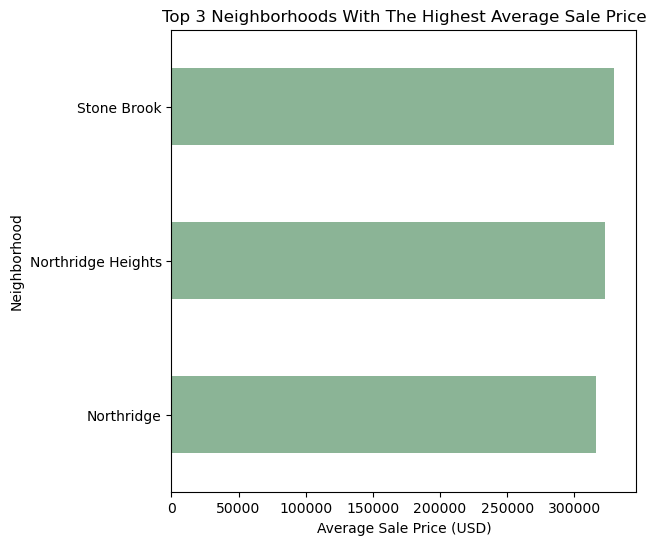

In [15]:
# Use undummified dataset and create a chart to show the relationship between neighborhood and saleprice
sale_neighbor = df_train_und.groupby('neighborhood')['saleprice'].agg(['mean'])
sale_neighbor_top3 = sale_neighbor.loc[sale_neighbor['mean']> 300_000]
sale_neighbor_top3 = sale_neighbor_top3.rename({'StoneBr':'Stone Brook', 'NridgHt':'Northridge Heights', 
                                                'NoRidge':'Northridge'})
sale_neighbor_top3.plot(kind='barh', color='#8bb496', 
                                          figsize=(6, 6), legend=False)
plt.title('Top 3 Neighborhoods With The Highest Average Sale Price')
plt.xlabel('Average Sale Price (USD)')
plt.ylabel('Neighborhood');

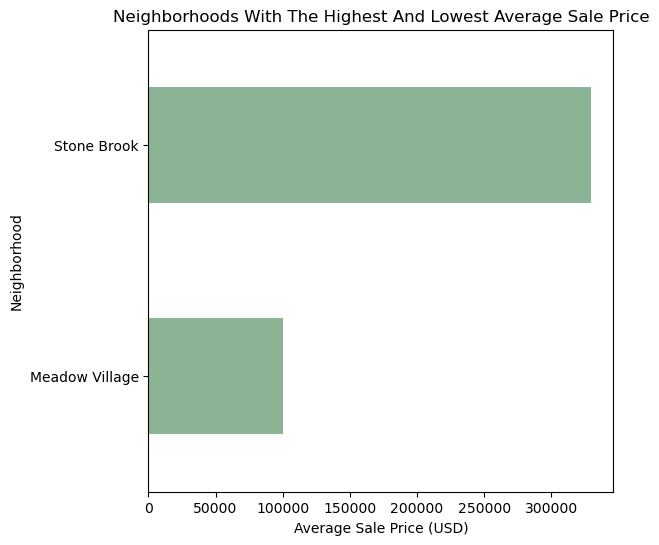

In [16]:
# Use undummified dataset and create a chart to show the relationship between neighborhood and saleprice
sale_neighbor = df_train_und.groupby('neighborhood')['saleprice'].agg(['mean'])
sale_neighbor_comp = sale_neighbor.loc[(sale_neighbor['mean']< 101_000) | (sale_neighbor['mean']> 323_000)]
sale_neighbor_comp = sale_neighbor_comp.rename({'StoneBr':'Stone Brook', 'MeadowV':'Meadow Village'})
sale_neighbor_comp.sort_values(by='mean', ascending=True).plot(kind='barh', color='#8bb496', 
                                          figsize=(6, 6), legend=False)
plt.title('Neighborhoods With The Highest And Lowest Average Sale Price')
plt.xlabel('Average Sale Price (USD)')
plt.ylabel('Neighborhood');

#### Home Size and Usable Space

Home Size and Usable Space: Home size is an important element and the dataset shows a positive correlation between home size and sale price. For example, `gr_liv_area` and `total_bsmt_sf` have a positive correlation with the `saleprice`, with correlation coefficients of 0.7 and 0.63, respectively. 

To incorporate this information into the model, a new column named `home_size` was created by combining the `gr_liv_area` and `total_bsmt_sf`. This feature engineering approach improved the correlation with saleprice and resulted in a slightly stronger correlation coefficient of 0.78.

In [17]:
# Create an interaction column between gr_liv_area * total_bsmt_sf
df_train['home_size'] = df_train['gr_liv_area'] + df_train['total_bsmt_sf']
df_test['home_size'] = df_test['gr_liv_area'] + df_test['total_bsmt_sf']

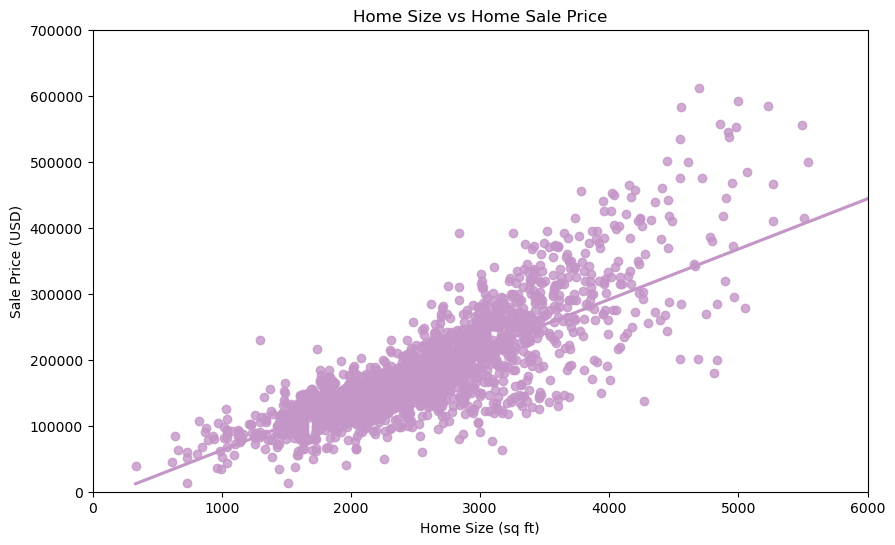

In [18]:
# Find a way to add a regression line in the chart
# Create the dataset
x = [df_train.home_size]
y = [df_train.saleprice]

# Size a plot
plt.figure(figsize=(10,6))

# Create a scatter plot <--- Learned how to from this website: (https://www.statology.org/scatterplot-with-regression-line-python/)
sns.regplot(x=x, y=y, ci=1, color='#c495c7')
plt.title('Home Size vs Home Sale Price')
plt.xlabel('Home Size (sq ft)')
plt.ylabel('Sale Price (USD)')
plt.xlim(0, 6000)
plt.ylim(0, 700000);

#### Age and Condition

Newer houses tend to have a higher appraised value, according to the Opendoor article. This trend was also observed in the dataset, as the `year_built` variable has a strong positive correlation with `saleprice` (correlation coefficients of 0.57). To visualize this trend, the bar chart was created to show the average home sale price by year built since the 1900s. The chart reveals a general increase in sale prices over the years, with even higher growth observed after the 1980s. 

On the other hand. the `overall_cond` has a weak negative correlation with `saleprice` (correlation coefficient of -0.097). To address this, a new interaction column, `age_cond` was created by combining `year_built` and `overall_cond`. This feature engineering approach slightly improved the correlation with `saleprice`, with a correlation coefficients of 0.58. 

Additionally, `overall_qual` has the strongest correlation to `saleprice` with a correlation coefficients of 0.80. This strong positive relationship was visualized in a line chart, indicating that homes with great finish quality or a move-in-ready condition are sold at higher prices. 

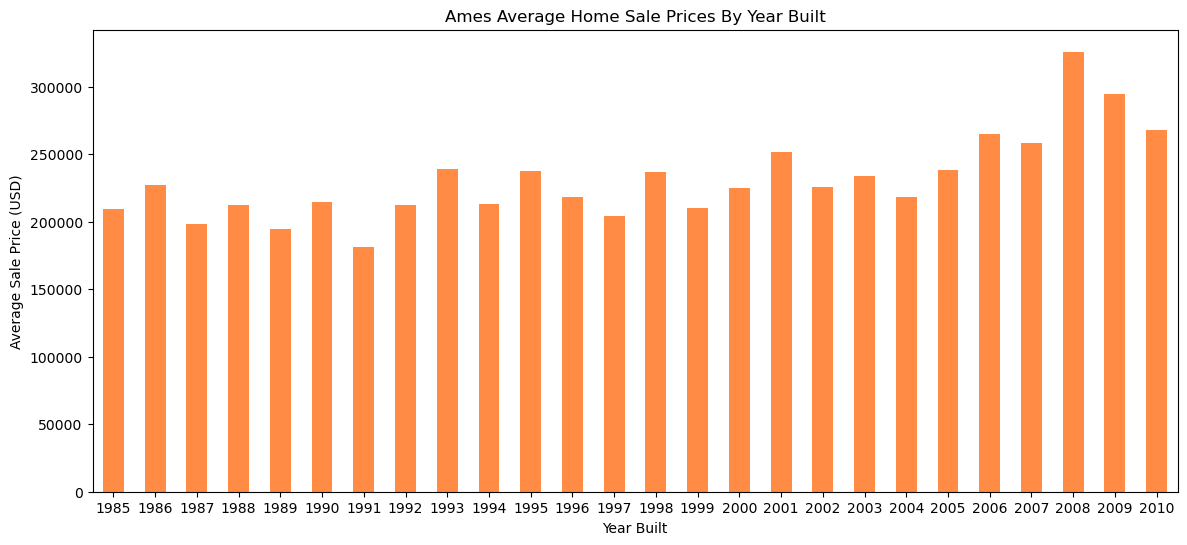

In [19]:
sale_age = df_train.groupby('year_built')['saleprice'].agg(['mean'])
sale_age = sale_age[sale_age.index >= 1985]

sale_age.plot(kind='bar', color='#ff8b44', figsize=(14, 6), legend=False)
plt.title('Ames Average Home Sale Prices By Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price (USD)')
plt.xticks(rotation=0);

In [20]:
# Create an interaction column between year_built + overall_cond
df_train['age_cond'] = df_train['year_built'] + df_train['overall_cond']
df_test['age_cond'] = df_test['year_built'] + df_test['overall_cond']

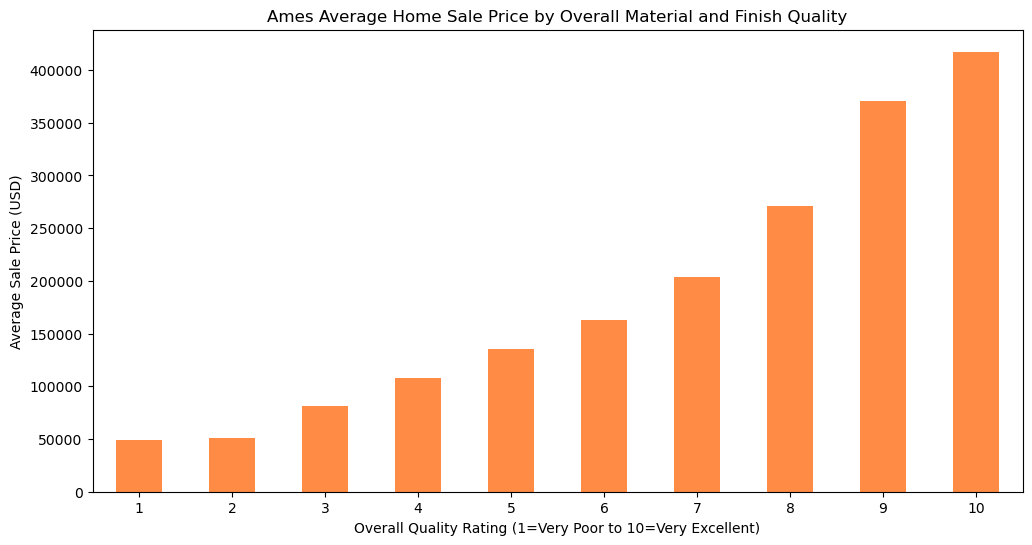

In [21]:
sale_cond = df_train.groupby('overall_qual')['saleprice'].agg(['mean'])

sale_cond.plot(kind='bar', color='#ff8b44', figsize=(12, 6), legend=False)
plt.title('Ames Average Home Sale Price by Overall Material and Finish Quality')
plt.xlabel('Overall Quality Rating (1=Very Poor to 10=Very Excellent)')
plt.ylabel('Average Sale Price (USD)')
plt.xticks(rotation=0);

#### Upgrades and Updates

A correlation coefficient between `year_remo/add` and `saleprice` is 0.55, indicating a positive relationship. Also, `bsmtfin_type_1_GLQ` has a correlation coefficient of 0.46 with `saleprice`, suggesting that a good quality finished basement can increase the saleprice of a home. The bar chart below shows the average sale price by remodel year and reveals a growing trend over the years. 

The dataset also includes information on the quality of basement, with variables such as Good Living Quarters, Low Quality,and Unfinished. A bar chart was created to show the average sale price by these conditions, and it revealed that a house with good living quality of basement is priced at more than 40% higher sale price than one with an unfinished basement. Therefore, finishing the basement or making other updates and upgrades can add value to a home price. 

As part of feature engineering approach, a new interaction column, `upgrades` was created by combining  `year_remod/add`, `bsmtfin_type_1_ALQ`, `bsmtfin_type_1_BLQ`, `bsmtfin_type_1_GLQ`, `bsmtfin_type_1_LwQ`, `bsmtfin_type_1_Rec`, `bsmtfin_type_1_Unf`, `bsmtfin_type_2_ALQ`, `bsmtfin_type_2_BLQ`, `bsmtfin_type_2_GLQ`, `bsmtfin_type_2_LwQ`, `bsmtfin_type_2_Rec`, and `bsmtfin_type_2_Unf`. Although this did not result in a major improvement in the correlation with `saleprice`, with corelation coefficients of 0.55, the column was kept for the model anyway. 

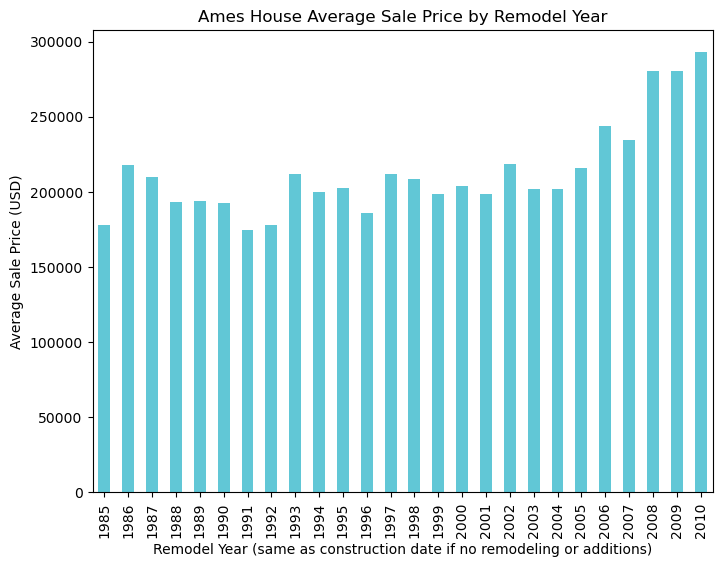

In [22]:
sale_remod = df_train.groupby('year_remod/add')['saleprice'].agg(['mean'])
sale_remod = sale_remod[sale_remod.index >= 1985]

sale_remod.plot(kind='bar', color='#61c7d6', figsize=(8, 6), legend=False)
plt.title('Ames House Average Sale Price by Remodel Year')
plt.xlabel('Remodel Year (same as construction date if no remodeling or additions)')
plt.ylabel('Average Sale Price (USD)');

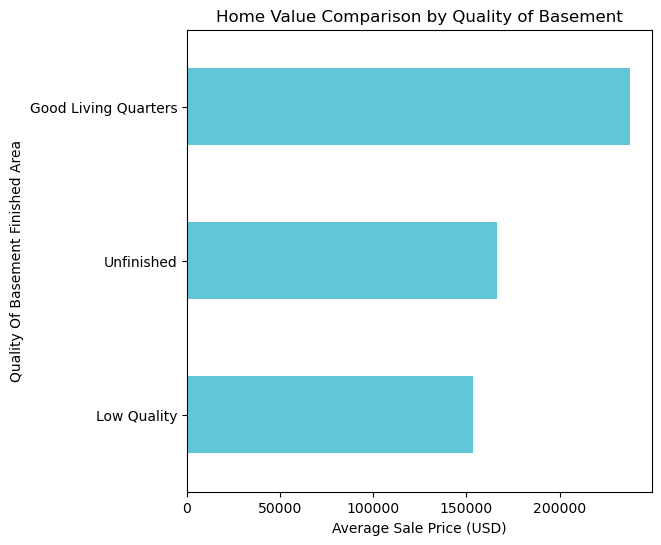

In [23]:
# Create a chart
sale_bsmtfin = df_train_und.groupby('bsmtfin_type_1')['saleprice'].agg(['mean'])
sale_bsmtfin_comp = sale_bsmtfin.loc[sale_bsmtfin['mean'] > 152_000]
sale_bsmtfin_comp = sale_bsmtfin_comp.rename({'GLQ':'Good Living Quarters', 'Unf':'Unfinished', 
                                                'ALQ':'ALQ', 'LwQ':'Low Quality'})
sale_bsmtfin_comp.drop(index='ALQ', axis=0, inplace=True)
sale_bsmtfin_comp.sort_values(by='mean', ascending=True).plot(kind='barh', color='#61c7d6', 
                                          figsize=(6, 6), legend=False)
plt.title('Home Value Comparison by Quality of Basement')
plt.xlabel('Average Sale Price (USD)')
plt.ylabel('Quality Of Basement Finished Area');

#sale_bsmtfin

In [24]:
# Create an interaction column between year_remod/add + bsmtfin_type_1_GLQ
df_train['upgrades'] = (df_train['year_remod/add'] + 
                        df_train['bsmtfin_type_1_ALQ'] + 
                        df_train['bsmtfin_type_1_BLQ'] + 
                        df_train['bsmtfin_type_1_GLQ'] + 
                        df_train['bsmtfin_type_1_LwQ'] + 
                        df_train['bsmtfin_type_1_Rec'] + 
                        df_train['bsmtfin_type_1_Unf'] + 
                        df_train['bsmtfin_type_2_ALQ'] + 
                        df_train['bsmtfin_type_2_BLQ'] + 
                        df_train['bsmtfin_type_2_GLQ'] + 
                        df_train['bsmtfin_type_2_LwQ'] + 
                        df_train['bsmtfin_type_2_Rec'] + 
                        df_train['bsmtfin_type_2_Unf'])
df_test['upgrades'] = (df_test['year_remod/add'] +
                       df_test['bsmtfin_type_1_ALQ'] +
                       df_test['bsmtfin_type_1_BLQ'] + 
                       df_test['bsmtfin_type_1_GLQ'] + 
                       df_test['bsmtfin_type_1_LwQ'] + 
                       df_test['bsmtfin_type_1_Rec'] + 
                       df_test['bsmtfin_type_1_Unf'] + 
                       df_test['bsmtfin_type_2_ALQ'] + 
                       df_test['bsmtfin_type_2_BLQ'] + 
                       df_test['bsmtfin_type_2_GLQ'] + 
                       df_test['bsmtfin_type_2_LwQ'] + 
                       df_test['bsmtfin_type_2_Rec'] + 
                       df_test['bsmtfin_type_2_Unf'])

#### Bathroom

There are different features for bathroom types and they have a range of correlation to `saleprice` as follows: (`full_bath`: r= 0.538, `bsmt_full_bath`: r=0.283, `half_bath`: r=0.283, `smt_half_bath`: r=-0.045). As part of feature engineering approach, a new interaction column called `total_bath` was created by combining all of these bathroom features. This resulted in `total_bath` having a higher correlation coefficient of 0.61 to `saleprice`. 

In [25]:
# Create an interaction column
df_train['total_bath'] = (df_train['full_bath'] + 
                          df_train['half_bath'] + 
                          df_train['bsmt_full_bath'] + 
                          df_train['bsmt_half_bath'])
df_test['total_bath'] = (df_test['full_bath'] + 
                         df_test['half_bath'] + 
                         df_test['bsmt_full_bath'] + 
                         df_test['bsmt_half_bath'])

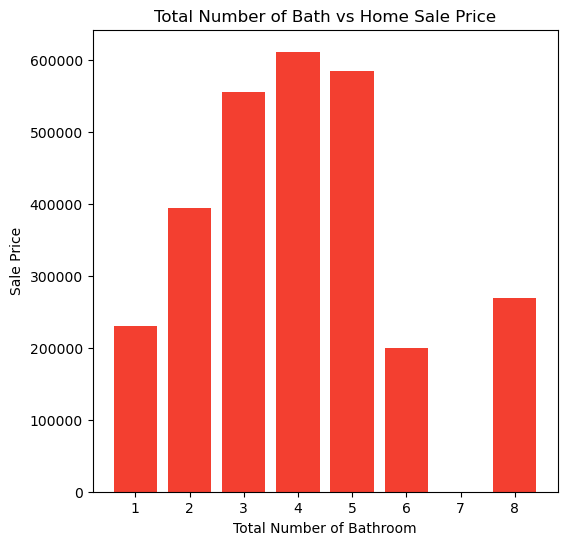

In [26]:
# Create dataframe
bath_saleprice = pd.DataFrame([df_train.total_bath, df_train.saleprice]).T
x = bath_saleprice['total_bath']
y = bath_saleprice['saleprice']

# Size 
plt.figure(figsize=(6, 6))

# Create a chart
plt.bar(x, y, color='#f33f30')
plt.title('Total Number of Bath vs Home Sale Price')
plt.xlabel('Total Number of Bathroom')
plt.ylabel('Sale Price');

#### Outdoor Space (Wood Deck Porch)

Similar to bathroom, there are different features for outdoor spaces as well and they have a range of correlation to saleprice as follows: (wood_deck_sf: r= 0.326, open_porch_sf: r=0.333, enclosed_porch: r=-0.136, 3ssn_porch: r=0.049, screen_porch r=0.135). As part of feature engineering approach, a new interaction column called `total_outdoor_space` was created by combining all of these basement features. This resulted in total_bath having a higher correlation coefficient of 0.41 to saleprice.

In [27]:
# Create an interaction column 
df_train['total_outdoor_space'] = (df_train['wood_deck_sf'] + 
                                   df_train['open_porch_sf'] + 
                                   df_train['enclosed_porch'] + 
                                   df_train['3ssn_porch'] + 
                                   df_train['screen_porch'])
df_test['total_outdoor_space'] = (df_test['wood_deck_sf'] + 
                                  df_test['open_porch_sf'] + 
                                  df_test['enclosed_porch'] + 
                                  df_test['3ssn_porch'] + 
                                  df_test['screen_porch'])

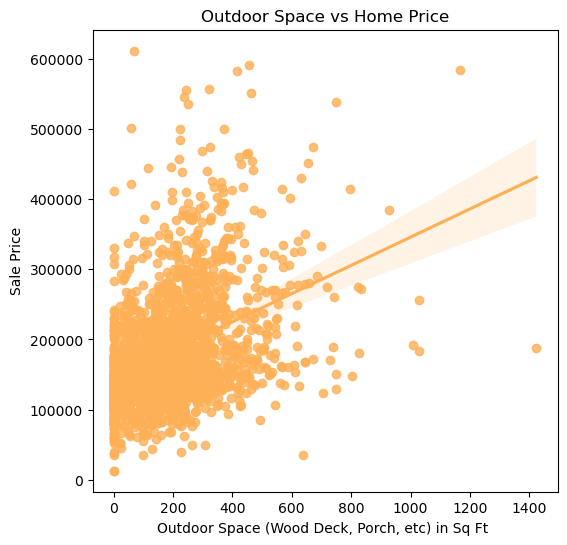

In [28]:
# Find a way to add a regression line in the chart
# Create the dataset
x = [df_train.total_outdoor_space]
y = [df_train.saleprice]

# Size a plot
plt.figure(figsize=(6,6))

# Create a scatter plot <--- Learned how to from this website: (https://www.statology.org/scatterplot-with-regression-line-python/)
sns.regplot(x=x, y=y, ci=100, color='#fdb056')
plt.title('Outdoor Space vs Home Price')
plt.xlabel('Outdoor Space (Wood Deck, Porch, etc) in Sq Ft ')
plt.ylabel('Sale Price');

### Correlation between new dependent variables and 'saleprice' (after feature engineering)

After EDA, new interaction columns, `home_size`, `age_cond`, `upgrades`, `total_bath`, and `total_outdoor_space` were created and their correlation with `saleprice` was analyzed. The below heatmap shows the correlation coefficients between these columns and `saleprice`. 

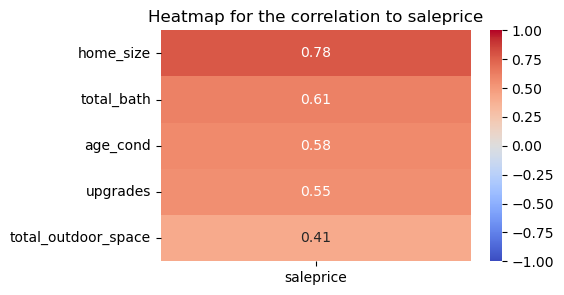

In [29]:
# Display the correlation between all variabvles and 'saleprice' (with new interactive columns)
df_train_corr_new = df_train.corr()[['saleprice']].sort_values(by='saleprice', 
                                                           ascending=False)

# Select columns that have equal or more than 60%/60% correlation to 'saleprice'
df_train_corr_new = df_train_corr_new.loc[['home_size', 'age_cond', 'upgrades', 
                                           'total_bath', 'total_outdoor_space'],:]

# Create a heatmap
plt.figure(figsize = (5,3))
sns.heatmap(df_train_corr_new.sort_values(by='saleprice', ascending=False),
            annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');
plt.title('Heatmap for the correlation to saleprice');

### Save cleaned dataframe as csv files

In [30]:
# Save train dataset in csv file
df_train.to_csv('../data/v3_train_eda_completed.csv', index = False)

In [31]:
# Save train dataset in csv file
df_test.to_csv('../data/v3_test_eda_completed.csv', index = False)

In [32]:
# Presentation Colors: 
# 283c9f / #f33f30 / #8bb496 / #c495c7 / #ffbdb4 / #ff8b44 / #fdb056 / #61c7d6 / #f6f6ea / #ffffff